
# TSIA201 - Wavelets and filterbanks lab
## Guillaume Capitan and Baptiste Moalic

Please find below our code used for the lab. In the archive, you will also find a pdf with every graph commented, and a folder with our graphs in higher resolution.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import pywt as pwt

## 1.1

In [2]:
#%% UPSAMPLING BY A FACTOR L

def upsampling(data,L):
  x = data
  y = []
  n = len(x)
  for k in range(0,n):
    y.append(x[k])
    if ((k+1)%(L-1))==0 and k!=(n-1):
      y.append(0)
  return y
    

#%% DOWNSAMPLING BY A FACTOR M

def downsampling(data,M):
  x = data
  y = []
  n = len(x)
  for k in range(0,n):
    if ((k)%M)==0:
      y.append(x[k])
  return y

#%% FILTRE ANALYTIQUE

def cqf_analysis_filterbank(x,h0):
    
    #Let's begin by defining the filters h1 the CQF solution
    N = np.size(h0)
    
    #h1(n) = (-1)^n * h0(N-1-n)
    h1 = np.zeros(N)
    for k in range(N):
        h1[k] = ((-1)**k)*h0[N-1-k]
        
    #Zero-padding
    zeros_to_add = np.zeros(N-1)
    x = np.append(x,zeros_to_add)
    
    #Filtering
    x0 = scipy.signal.lfilter(h0,[1],x)
    x1 = scipy.signal.lfilter(h1,[1],x)
    
    #Decimation
    u0 = downsampling(x0,2)
    u1 = downsampling(x1,2)
    
    return (u0,u1)

## 1.2

In [3]:
#%% FILTRE DE SYNTHESE

def cqf_synthesis_filterbank(u0,u1,h0):
    
    #Let's begin by defining the filters f0 and f1 the CQF solution
    N = np.size(h0)
    
    #f0(n) = h0(N-1-n)
    f0 = np.zeros(N)
    for k in range(N):
        f0[k] = h0[N-1-k]
        
    #f1(n) = (-1)^(n-1) * h0(n)
    f1 = np.zeros(N)
    for k in range(N):
        f1[k] = ((-1)**(k-1))*h0[k]
        
    #Upsampling
    v0 = upsampling(u0,2)
    v1 = upsampling(u1,2)
    
    #Zero-padding
    zeros_to_add = np.zeros(N-1)
    v0 = np.append(v0,zeros_to_add)
    v1 = np.append(v1,zeros_to_add)
    
    #Filtering
    y0 = scipy.signal.lfilter(f0,[1],v0)
    y1 = scipy.signal.lfilter(f1,[1],v1)
    
    return y0+y1

## 1.3

For the Haar filter 2 new coefficients have been added
For the Daubechies filter 6 new coefficients have been added


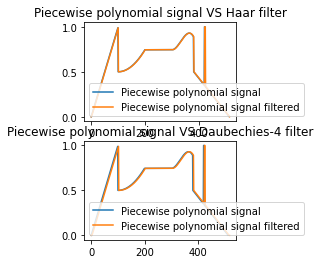

In [16]:
#%% PIECE-WISE POLYNOMIAL SIGNAL

x=np.zeros(512)
N1 = 100
N2 = 200
N3 = 300
N4 = 380
N5 = 512
r1 = np.arange(0,N1)
r2 = np.arange(N1,N2)
r3 = np.arange(N2,N3)
r4 = np.arange(N3,N4)
r5 = np.arange(N4,N5)
x[r1] = r1/float(N1)
x[r2] =0.5+ ((r2-float(N1))/float(N2))**2
x[r3] = x[N2-1]
t4 = (r4-float(N3))/float(N4)
x[r4] = -80*t4**3 + 20*t4**2 + x[N2-1]
x[r5] = 0.5*(1-(r5-float(N4))/(float(N5-N4)))
x[420:423] =1

plt.figure(1)
plt.subplot(221)
plt.plot(x,label='Piecewise polynomial signal')

haar_filter = np.array([0.707106781187, 0.707106781187])
daubechies_filter = np.array([0.482962913145, 0.836516303738, 0.224143868042, -0.129409522551])

#Plotting Haar-filtered response
a_haar = cqf_analysis_filterbank(x, haar_filter)
b_haar = cqf_synthesis_filterbank(a_haar[0], a_haar[1], haar_filter)
plt.plot(b_haar,label='Piecewise polynomial signal filtered')
plt.title("Piecewise polynomial signal VS Haar filter")
plt.legend()

#Plotting Daubechies-4-filtered response
a_daubechies = cqf_analysis_filterbank(x, daubechies_filter)
b_daubechies = cqf_synthesis_filterbank(a_daubechies[0], a_daubechies[1], daubechies_filter)
plt.subplot(223)
plt.plot(x,label='Piecewise polynomial signal')
plt.plot(b_daubechies,label='Piecewise polynomial signal filtered')
plt.title("Piecewise polynomial signal VS Daubechies-4 filter")
plt.legend()

#How many coefficients have been added?
print('For the Haar filter '+str(len(b_haar)-512)+' new coefficients have been added')
print('For the Daubechies filter '+str(len(b_daubechies)-512)+' new coefficients have been added')

#### You can find our answers to 1.4 and 1.5 in the pdf in the archive

## 1.6

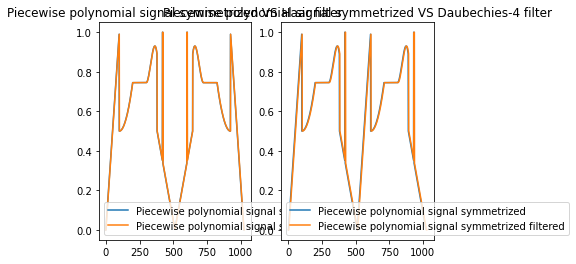

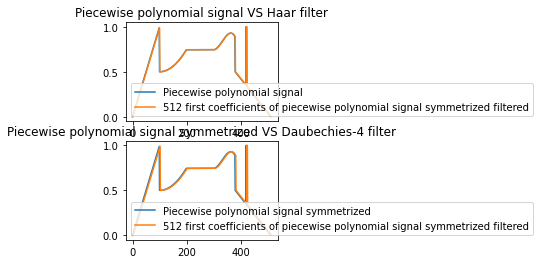

In [17]:
#%% PERIODIZATION

#Let's use symmetric periodization for the Haar filter (linear phase)
x_flipped = np.flip(x)
x_sym = np.copy(x)
x_sym = np.append(x_sym, x_flipped)

#And let's keep a periodised version of x
x_per = np.copy(x)
x_per = np.append(x_per,x_per)

#Result for the Haar filter
a_haar_sym = cqf_analysis_filterbank(x_sym, haar_filter)
b_haar_sym = cqf_synthesis_filterbank(a_haar_sym[0], a_haar_sym[1], haar_filter)
plt.figure(2)
plt.subplot(121)
plt.plot(x_sym,label='Piecewise polynomial signal symmetrized')
plt.plot(b_haar_sym,label='Piecewise polynomial signal symmetrized filtered')
plt.title("Piecewise polynomial signal symmetrized VS Haar filter")
plt.legend()

plt.figure(1)
plt.subplot(222)
plt.plot(x,label='Piecewise polynomial signal')
plt.plot(b_haar_sym[:513],label='512 first coefficients of piecewise polynomial signal symmetrized filtered')
plt.title("Piecewise polynomial signal VS Haar filter")
plt.legend()

#Result for the Daubechies filter
a_daubechies_sym = cqf_analysis_filterbank(x_per, daubechies_filter)
b_daubechies_sym = cqf_synthesis_filterbank(a_daubechies_sym[0], a_daubechies_sym[1], daubechies_filter)
plt.figure(2)
plt.subplot(122)
plt.plot(x_per,label='Piecewise polynomial signal symmetrized')
plt.plot(b_daubechies_sym,label='Piecewise polynomial signal symmetrized filtered')
plt.title("Piecewise polynomial signal symmetrized VS Daubechies-4 filter")
plt.legend()

plt.figure(1)
plt.subplot(224)
plt.plot(x,label='Piecewise polynomial signal symmetrized')
plt.plot(b_daubechies_sym[:513],label='512 first coefficients of piecewise polynomial signal symmetrized filtered')
plt.title("Piecewise polynomial signal symmetrized VS Daubechies-4 filter")
plt.legend()

## 1.7 and 1.8

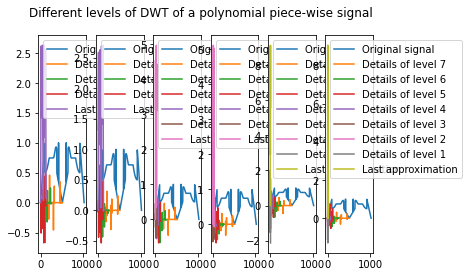

In [15]:
#%% DWT

def MRA(x, h0, nLev, subplot):
    plt.subplot(subplot)
    approx = x
    plt.plot(x, label='Original signal')
    for k in range(nLev):
        cqf_result = cqf_analysis_filterbank(approx, h0)
        approx = cqf_result[0]
        details = cqf_result[1]
        plt.plot(details, label='Details of level '+str(nLev-k))
    plt.plot(approx, label='Last approximation')
    plt.legend()
    return 0

plt.figure(3)
plt.suptitle('Different levels of DWT of a polynomial piece-wise signal')
Haar_MRA_3 = MRA(x_sym, haar_filter, 3, 161)
Daubechies_MRA_3 = MRA(x_sym, daubechies_filter, 3, 162)
Haar_MRA_5 = MRA(x_sym, haar_filter, 5, 163)
Daubechies_MRA_5 = MRA(x_sym, daubechies_filter, 5, 164)
Haar_MRA_7 = MRA(x_sym, haar_filter, 7, 165)
Daubechies_MRA_7 = MRA(x_sym, daubechies_filter, 7, 166)
plt.show()

## 1.9 and 1.10

C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values t

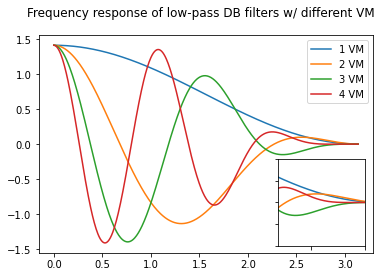

C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values t

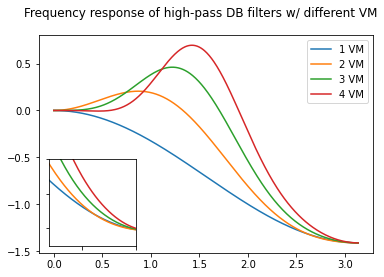

In [7]:
#%% Designing filters with pwt.Wavelet


#Daubechies filterbank with 1 vanishing moment
db1 = pwt.Wavelet('db1')
low_db1 = db1.dec_lo
high_db1 = db1.dec_hi
    
#Daubechies filterbank with 2 vanishing moments
db2 = pwt.Wavelet('db2')
low_db2 = db2.dec_lo
high_db2 = db2.dec_hi
    
#Daubechies filterbank with 3 vanishing moments
db3 = pwt.Wavelet('db3')
low_db3 = db3.dec_lo
high_db3 = db3.dec_hi
    
#Daubechies filterbank with 4 vanishing moments
db4 = pwt.Wavelet('db4')
low_db4 = db4.dec_lo
high_db4 = db4.dec_hi
    
#Computing of the frequency responses
w, freq_low_db1 = scipy.signal.freqz(low_db1,1)
w, freq_high_db1 = scipy.signal.freqz(high_db1,1)
w, freq_low_db2 = scipy.signal.freqz(low_db2,1)
w, freq_high_db2 = scipy.signal.freqz(high_db2,1)
w, freq_low_db3 = scipy.signal.freqz(low_db3,1)
w, freq_high_db3 = scipy.signal.freqz(high_db3,1)
w, freq_low_db4 = scipy.signal.freqz(low_db4,1)
w, freq_high_db4 = scipy.signal.freqz(high_db4,1)

#Plotting
plt.figure(4)
plt.suptitle('Frequency response of low-pass DB filters w/ different VM')
plt.plot(w,freq_low_db1,label='1 VM')
plt.plot(w,freq_low_db2,label='2 VM')
plt.plot(w,freq_low_db3,label='3 VM')
plt.plot(w,freq_low_db4,label='4 VM')
plt.legend()

zoom_low_plot = plt.axes([.68,.15,.2,.3])
zoom_low_plot.set_yticklabels([])
zoom_low_plot.set_xticklabels([])
plt.plot(w,freq_low_db1,label='1 VM')
plt.plot(w,freq_low_db2,label='2 VM')
plt.plot(w,freq_low_db3,label='3 VM')
plt.plot(w,freq_low_db4,label='4 VM')
zoom_low_plot.set_xlim(2.2,3)
zoom_low_plot.set_ylim(-0.5,0.5)
plt.show()


plt.figure(5)
plt.suptitle('Frequency response of high-pass DB filters w/ different VM')
plt.plot(w,freq_high_db1, label='1 VM')
plt.plot(w,freq_high_db2, label='2 VM')
plt.plot(w,freq_high_db3, label='3 VM')
plt.plot(w,freq_high_db4, label='4 VM')
plt.legend()

zoom_high_plot = plt.axes([.15,.15,.2,.3])
zoom_high_plot.set_yticklabels([])
zoom_high_plot.set_xticklabels([])
plt.plot(w,freq_high_db1, label='1 VM')
plt.plot(w,freq_high_db2, label='2 VM')
plt.plot(w,freq_high_db3, label='3 VM')
plt.plot(w,freq_high_db4, label='4 VM')
zoom_high_plot.set_xlim(2.2,3)
zoom_high_plot.set_ylim(-1.5,-1)
plt.show()

## 2.1

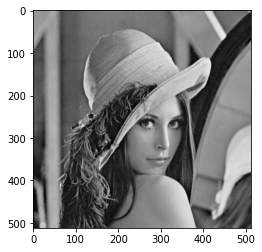

In [8]:
#%% Loading and displaying lena.jpg

import matplotlib.image as mpimg

plt.figure(6)
img = mpimg.imread("lena.jpg")
plt.imshow(img)
plt.set_cmap("gray")
plt.show()

## 2.2

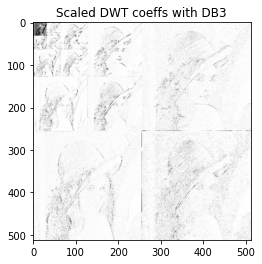

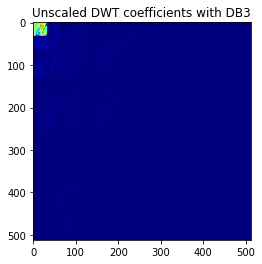

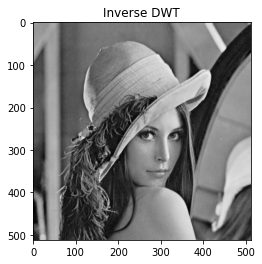

(Text(0.5, 1.0, 'Inverse DWT'), None, None)

In [9]:
#%% 2D DWT

import wtt

#First with a Daubechies filter with 3 vanishing moments
plt.figure(7)
wav = 'db3'
NLEV = 4
filter_bank = pwt.Wavelet(wav)
coeffs = pwt.wavedec2(img, filter_bank, mode='per', level=NLEV)
arr = wtt.coeffs_to_array(coeffs)
wtt.wtView(coeffs, 'Scaled DWT coeffs with DB3')
plt.figure(8)
plt.imshow(np.abs(arr/arr.max()))
plt.set_cmap('jet')
plt.title('Unscaled DWT coefficients with DB3')
plt.show()

plt.figure(9)
decoded = pwt.waverec2(coeffs, filter_bank, mode='per')
plt.imshow(np.uint8(decoded))
plt.title('Inverse DWT') , plt.set_cmap('gray'), plt.show()

## 2.3 and 2.4

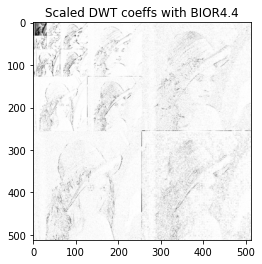

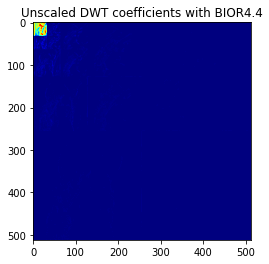

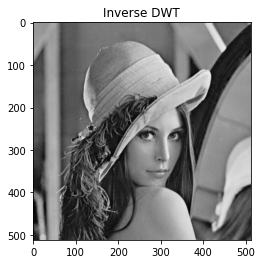

(Text(0.5, 1.0, 'Inverse DWT'), None, None)

In [10]:
#Then with a bi-orthogonal 4.4 filter
plt.figure(10)
wav = 'bior4.4'
NLEV = 4
filter_bank = pwt.Wavelet(wav)
coeffs = pwt.wavedec2(img, filter_bank, mode='per', level=NLEV)
arr = wtt.coeffs_to_array(coeffs)
wtt.wtView(coeffs, 'Scaled DWT coeffs with BIOR4.4')
plt.figure(11)
plt.imshow(np.abs(arr/arr.max()))
plt.set_cmap('jet')
plt.title('Unscaled DWT coefficients with BIOR4.4')
plt.show()

plt.figure(12)
decoded = pwt.waverec2(coeffs, filter_bank, mode='per')
plt.imshow(np.uint8(decoded))
plt.title('Inverse DWT') , plt.set_cmap('gray'), plt.show()

## 2.5

C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\bapti\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


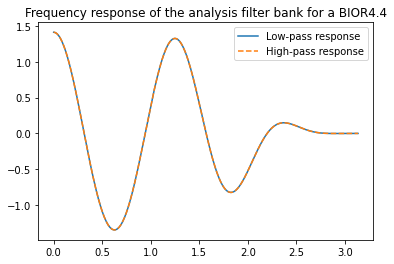

In [11]:
#%% Frequency response of this bi-orthogonal 4.4 filter
low_bior44 = filter_bank.dec_lo
high_bior44 = filter_bank.dec_hi
    
#Computing of the frequency responses
w, freq_low_bior44 = scipy.signal.freqz(low_bior44,1)
w, freq_high_bior44 = scipy.signal.freqz(high_bior44,1)
plt.figure(13)
plt.plot(w, freq_low_bior44, label='Low-pass response')
plt.plot(w, freq_low_bior44, '--', label='High-pass response')
plt.legend()
plt.title('Frequency response of the analysis filter bank for a BIOR4.4')
plt.show()

## 2.6

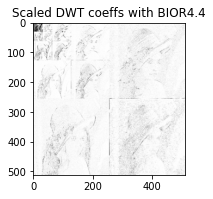

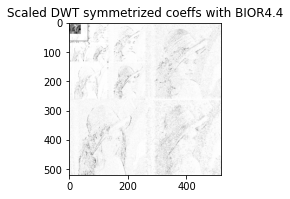

In [12]:
#%% Let's use the 'modes' option in pwt.wavedec2 in order to compare the border effects

#We can use symmetrization because the filter is linear
plt.figure(14)
plt.subplot(121)
wav = 'bior4.4'
NLEV = 4
filter_bank = pwt.Wavelet(wav)
coeffs = pwt.wavedec2(img, filter_bank, mode='per', level=NLEV)
arr = wtt.coeffs_to_array(coeffs)
wtt.wtView(coeffs, 'Scaled DWT coeffs with BIOR4.4')

plt.subplot(122)
coeffs = pwt.wavedec2(img, filter_bank, mode='symmetric', level=NLEV)
arr = wtt.coeffs_to_array(coeffs)
wtt.wtView(coeffs, 'Scaled DWT symmetrized coeffs with BIOR4.4')

#%